<a href="https://colab.research.google.com/github/sleeptiger/Abc-project/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 기초

## 머신러닝이란?

1. 묘사분석(어떤 일이 생겼는가?)
2. 진단 분석(왜 이 일이 생겼는가?)
3. 예측 분석(미래에 무슨일이 생길까?)
4. 처방 분석(무엇을 행동해야하는가?)

- 3번4번이 머신러닝을 활용하는 단계 분석

- 머신러닝으로 할 수 있는 것들
> - 분류, 예측 분석
> - 이미지 인식
> - 음성, 테스트 인식
> - 추천 시스템


## 전처리 기본(정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할)


- 머신러닝의 가장 중요한 부분은 **데이터 전처리**입니다.
- 데이터 분석가의 머신러닝 모델의 성능을 활성하기 위한 작업중 70%이상이 전처리 부분에 해당합니다.
- 전처리 작업에는 **결측값 처리, 정규화, 표준화(수치형), 범주형 데이터의 수치형 변환, 학습/테스트 분할, Feature Engineering emd**이 있다.

In [2]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


### 정규화(Normalization), 표준화(Standardization)

- 정규화와 표준화는 모두 수치형 데이터 전처리에서 중요한 요소입니다.
- 학습 데이터의 feature 간 단위나 스케일(scale)차이가 클수록 학습 모델의 성능이 저하된다.
- 따라서 수치형 데이터의 **단위를 맞춰주는 작업을 스케일링(scaling)이라고 합니다.
- 스케링에는 일정 구간을 정해주는 정규화(Normalization) 방법과 평균(0)과 표준편차(1)를 사용하는 표준화(Standardization) 방법이 있습니다.

- 정규화
> - 0~1사이의 값으로 변환(수치형 컬럼에서만 정규화 가능) 플러스 값으로 표현

- 표준화
> - 평균을 0으로 하고 표준편차를 1로 한다.(비지도 학습 사용시 사용함)(최솟값/최댓값이 설정 안될 시에 사용)

In [6]:
# feature 들 간 단위가 다릅니다. (bill_length_mm/bill_depth_mm/flipper_length_mm)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


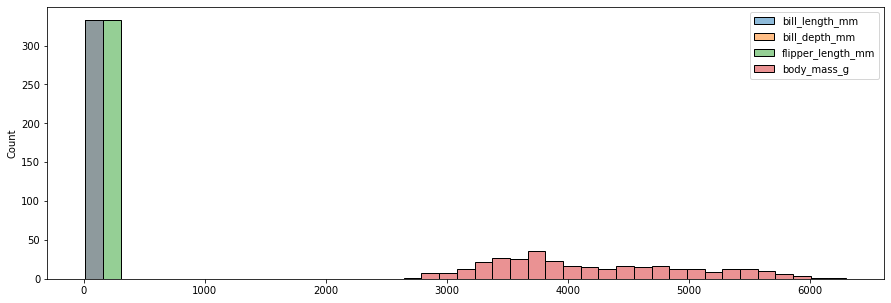

In [7]:
# 도표를 통해 확인 
plt.figure(figsize=(15,5 ))
sns.histplot(data=penguins)
# 데이터의 편차가 너무 심하다 정리가 필요

**정규화(Normalization)**
- `MinMaxScaler`를 활용한 0-1 사이 분포 만들기
- 같은 범위의 데이터로 변환하기 때문에, 모델 학습 성능이 좋아지고, 학습 시간이 줄어드는 효과가 있다.
- 자릿수가 늘어나지 않아 연산 오버플로우(`numeric overflow`)를 방지 할 수있다.

In [8]:
from sklearn.preprocessing import MinMaxScaler # 라이브러리 로딩
scaler = MinMaxScaler() # 스케일러로 정의

penguins_normed = penguins.copy()
features = penguins_normed[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] # 정규화 대상 선택
features_normed = scaler.fit_transform(features)  #정규화 실행
features_normed.shape

(333, 4)

In [9]:
features_normed
# 순서대로 1 col =bill_length/ 2 col =bill_depth/ 3 col = flipper_length / 4 col = body_mass_g

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [10]:
# 정규화 시킨 데이터 입히기
# .assign (데이터 삽입하기)
penguins_normed = penguins_normed.assign(bill_length_mm = features_normed[:,0],
                                         bill_depth_mm = features_normed[:,1],
                                         flipper_length_mm = features_normed[:,2],
                                         body_mass_g = features_normed[:,3])

penguins_normed

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,Male
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,Female
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,Female
3,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,Female
4,Adelie,Torgersen,0.261818,0.892857,0.305085,0.263889,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.549091,0.071429,0.711864,0.618056,Female
329,Gentoo,Biscoe,0.534545,0.142857,0.728814,0.597222,Female
330,Gentoo,Biscoe,0.665455,0.309524,0.847458,0.847222,Male
331,Gentoo,Biscoe,0.476364,0.202381,0.677966,0.694444,Female


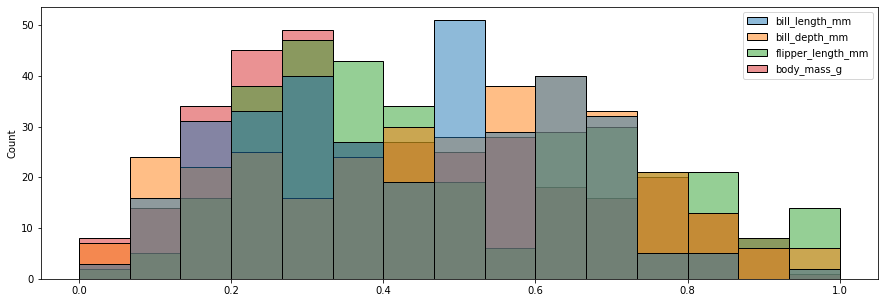

In [11]:
# 눈의로 확인 하기
plt.figure(figsize=(15, 5))
sns.histplot(data=penguins_normed)
# 혼자 떨어져 있는 데이터가 없고 모여있는 데이터로 합쳐졌다.

**표준화(Standardization)**
- `StandardScaler`를 활용한 평균 0, 표준편차 1 분표 만들기
- 만약 Feature 가 단위 차이가 극심하게 차이가 나는 상황이라면, 정규화 보다는 표준화 방법이 선호된다.      (정규화는 작은 범위로 데이터를 압축하기 때문에 정보 손실이 발생한다.)
- 비지도 학습(최대 최소 범위를 알기 힘든 상황)에서도 **표준화 방법**이 선호됩니다.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 스케일러 정의 

penguins_stand = penguins.copy()
features = penguins_stand[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] # 표준화 대상 지정
features_stand = scaler.fit_transform(features) # 표준화 

In [13]:
# .assign (데이터 삽입하기)
penguins_stand = penguins_stand.assign(bill_length_mm = features_stand[:,0],
                                         bill_depth_mm = features_stand[:,1],
                                         flipper_length_mm = features_stand[:,2],
                                         body_mass_g = features_stand[:,3])

penguins_stand

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


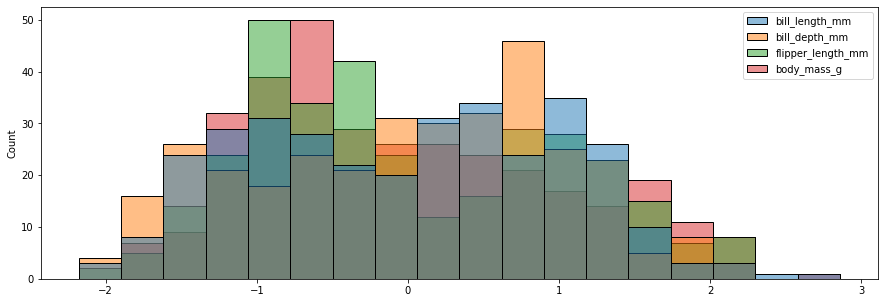

In [14]:
# 눈으로 확인
plt.figure(figsize=(15,5))
sns.histplot(data=penguins_stand)

### **범주형 데이터의 수치화 (인코딩,Encoding)**
> - scikt-learn의 머신 러닝 알고리즘은 범주형 데이터를 계산할 수 없습니다.
> - 따라서 일반적으로 범주형 데이터를 수치화(인코딩)해서 사용합니다.
> - 범주형 데이터 수치화 방법 : 대표적으로 `라벨 인코딩(Label Encoding), 원핫 인코딩(One-hot Encoding)` 방법이 있습니다.

In [15]:
penguins_stand

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
3,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
4,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
329,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
330,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
331,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [16]:
penguins_stand['island'].unique()
# 3가지의 value 존재    

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [17]:
penguins_stand['sex'].unique()
# 남/녀 2개 존재

array(['Male', 'Female'], dtype=object)

> 라벨 인코딩 (`Label Encoding`)
> - 범주형 데이터의 범주 가짓수에 따라 숫자를 할당해주는 방법입니다.

In [18]:
from sklearn.preprocessing import LabelEncoder # 라이브러리 로딩
encoder = LabelEncoder() 

penguins_label = penguins_stand.copy()
features = penguins_label[['species', 'island', 'sex']] # 인코딩 할 대상
encoded = features.apply(encoder.fit_transform)
encoded

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,1
...,...,...,...
328,2,0,0
329,2,0,0
330,2,0,1
331,2,0,0


In [19]:
# 수치형 데이터로 바꾸지
penguins_label = penguins_label.assign(species = encoded['species'],
                                       island = encoded['island'],
                                       sex = encoded['sex'])

penguins_label

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
328,2,0,0.587352,-1.762145,0.931283,0.892957,0
329,2,0,0.514098,-1.457000,1.002739,0.799674,0
330,2,0,1.173384,-0.744994,1.502928,1.919069,1
331,2,0,0.221082,-1.202712,0.788372,1.234995,0


> 원 핫 인코딩 (`One Hot Encoding`)
> - 범주형 데이터의 범주 가짓수에 컬럼을 추가 해주는 방법입니다.
> - 범주에 포함되는 컬럼에 1을 부여하고 다른 컬럼을 0을 부여한다.

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

penguins_onehot = penguins_stand.copy()
features = penguins_onehot[['species', 'island', 'sex']]
encoded = encoder.fit_transform(features).toarray() 

In [21]:
encoded

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [22]:
encoder.categories_

[array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array(['Biscoe', 'Dream', 'Torgersen'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [23]:
# 기존 범주형 컬럼 버리기
penguins_onehot = penguins_onehot.drop(columns=['species', 'island', 'sex'])

#인코딩 결과 프레임 생성
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = encoder.get_feature_names_out()

#기존 데이터 프레임과 결함
penguins_onehot = pd.concat([penguins_onehot, encoded_df], axis=1)

In [24]:
penguins_onehot

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-0.896042,0.780732,-1.426752,-0.568475,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.822788,0.119584,-1.069474,-0.506286,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.676280,0.424729,-0.426373,-1.190361,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,-1.335566,1.085877,-0.569284,-0.941606,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.859415,1.747026,-0.783651,-0.692852,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
329,0.514098,-1.457000,1.002739,0.799674,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
330,1.173384,-0.744994,1.502928,1.919069,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
331,0.221082,-1.202712,0.788372,1.234995,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### 학습/테스트 데이터 세트 분할


- scikt-learn 은 학습 데이터 세트를 자동으로 분할해주는 기능을 제공합니다.
- 테스트에 사용하고 싶은 데이터를 비율로 조종할 수 있다.

In [25]:
penguins_label.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
3,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,2,-0.859415,1.747026,-0.783651,-0.692852,1


In [26]:
from sklearn.model_selection import train_test_split

X = penguins_label.drop('sex', axis=1)      # 예측에 사용되는 변수
Y = penguins_label['sex']                   # 예측할 변수

In [27]:
#학습/테스트 세트 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [28]:
len(X_train), len(Y_train), len(Y_test), len(Y_test)

(266, 266, 67, 67)

In [29]:
X_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
86,0,1,-1.830031,-0.032989,-1.140929,-1.003795
247,2,0,0.935309,-1.202712,1.360017,1.172806
215,2,0,1.100130,-0.439849,2.074573,1.856881
35,0,1,-1.372193,0.424729,-1.355296,-1.314738
137,0,1,-0.603026,-0.083846,-0.783651,-0.599569
...,...,...,...,...,...,...
88,0,1,-1.427134,0.068726,-0.998018,-1.128172
234,2,0,1.136757,-1.457000,1.217106,1.856881
135,0,1,-0.621339,0.017869,-0.998018,-0.910512
27,0,1,-0.822788,0.323014,-0.926562,-1.128172


In [30]:
Y_test

52     0
13     0
160    0
321    0
233    1
      ..
54     0
81     0
72     0
80     1
75     1
Name: sex, Length: 67, dtype: int64

> ### **로지스틱 회귀**
> - 로지스틱 회귀(Logistic Regression)은 **대표적인 2진 분류 머신러닝 알고리즘**이다.
> - 회귀(Regression) + 시그모이드(Sigmoid Fuction)함수를 사용해서 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측해줍니다. (2진분류 = 2가지의사항 ex:남자/여자, 참/거짓...) (시그모이드 함수 = S자형)
> - 회귀 방법론은 변수들 사이의 관계를 '모델링'하는 기법이다. (X와 Y의 관계)
> - ex) 스팸일 확률이 0.5이상이면 스팸으로 분류하고, 0.5보다 작으면 정상 메일로.분류한다.

1. [Lr]모델링 정의

In [31]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(verbose=2)

In [32]:
# 파리미터 종류
lr_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

2. [LR] 모델 학습

In [33]:
lr_model.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=2)

3. [LR] 예측

In [34]:
# 수컷 = 1/ 암컷 = 0
predictions = lr_model.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1])

In [35]:
#성능 평가
from sklearn.metrics import accuracy_score # 정확도를 나타내는 라이브러리
lr_acc = accuracy_score(Y_test, predictions)
print('Logistic Regression 모델의 예측 정확도는 {}% 입니다.'.format(round(lr_acc*100)))

Logistic Regression 모델의 예측 정확도는 96% 입니다.


> ### 최근접 이웃 분류기(KNeighborsClassifier)
> - 입력데이터가 주어졌을때, 입력 값과 가까운 K개의 데이터가 속해 있는 범주를 예측 해주는 알고리즘
> - 데이터 간 거리를 측정할 때 '유클리디안 거리'를 사용한다. 실제로 떨어져있는 거리

1. [KNC]모델 정의

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier()

In [37]:
# 파라미터 종류
knc_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

2. [KNC] 모델 학습

In [38]:
knc_model.fit(X_train, Y_train)

KNeighborsClassifier()

3. [KNC]예측

In [39]:
#수컷 = 1/ 암컷 = 0
predictions = knc_model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1])

In [40]:
# 성능 평가
knc_acc = accuracy_score(Y_test, predictions)
print('KNeighborsClassifier 모델의 예측 정확도는 {}% 입니다.'.format(round(knc_acc*100)))

KNeighborsClassifier 모델의 예측 정확도는 94% 입니다.


> ### 의사결정나무(Decision Tree)
> - 의사 결정 나무(Decision Tree)란 의사 결정 규칙을 나무(tree)구조로 나타내어서**전체 데이터를 분류** 하거나, **수치형 자료를 예측**하는데 모두 사용할 수 있는 알고리즘입니다.
> - 의사결정 나무 알고리즘은 **가지분할(split)**, **가지치기(pruning)**방법을 사용해서 복잡한 모델에서 단순화 과정을 거칩니다.
> - 나무 모형의 크기에 따라 머신 러닝 성능이 달라지기 때문에 적절한 크기로 설정해주어야 한다.

1. [DT] 모델 정의

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

In [42]:
dtc_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

2. [DT]모델 학습

In [43]:
dtc_model.fit(X_train, Y_train)

DecisionTreeClassifier()

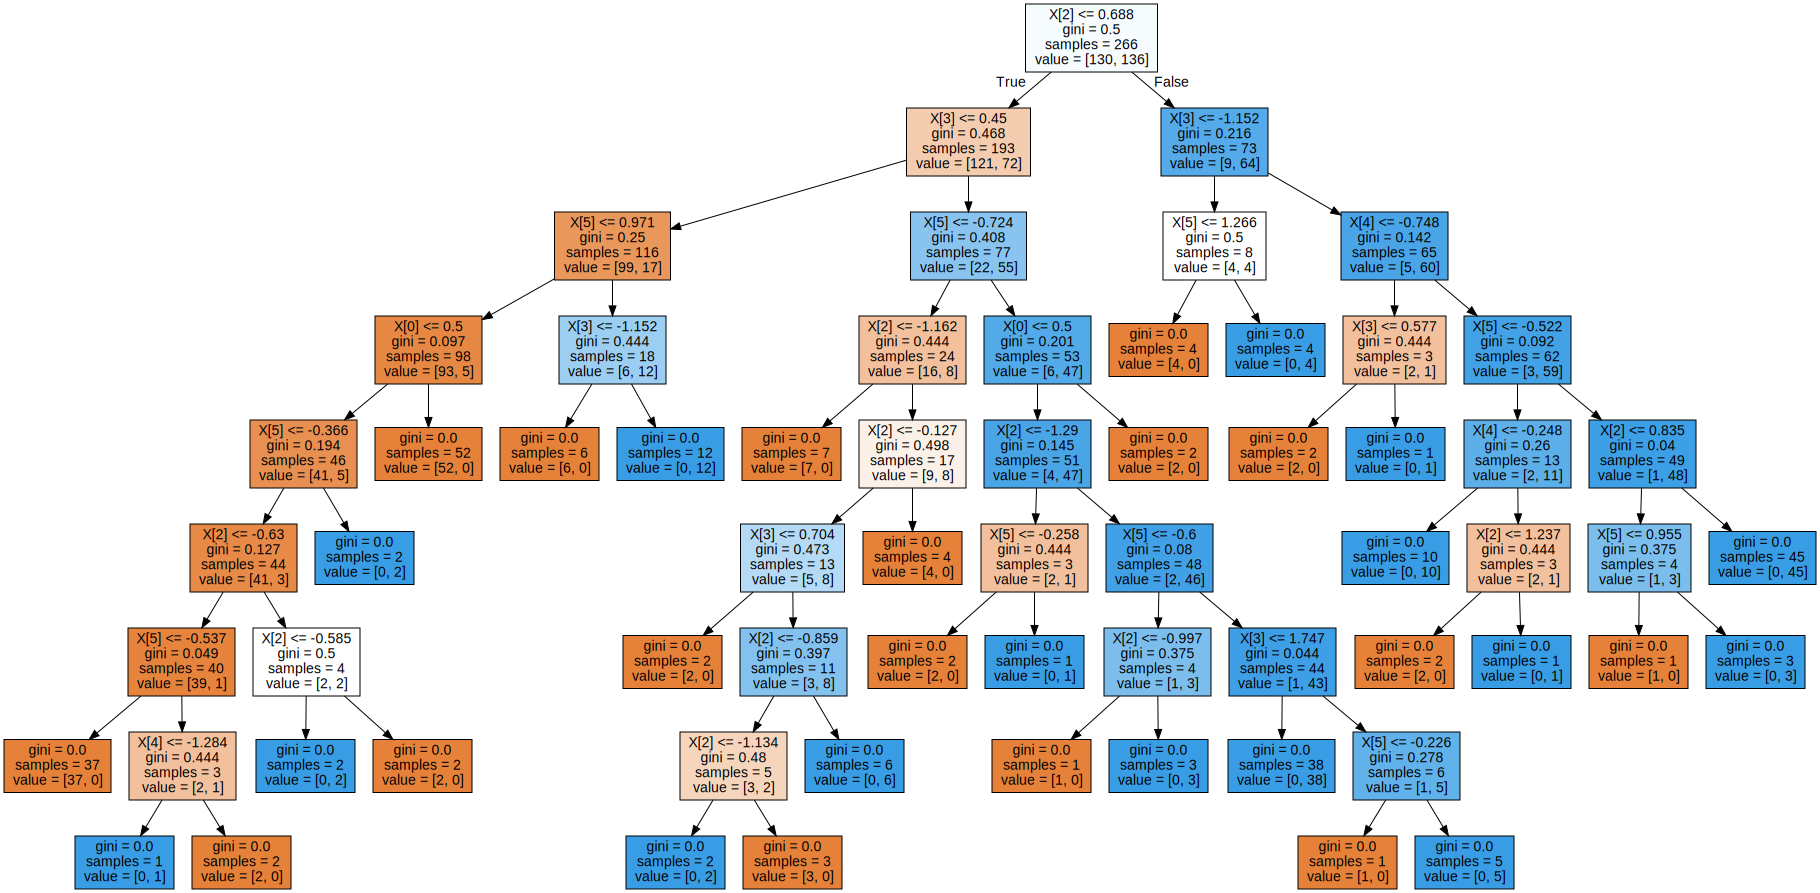

In [44]:
# 학습된 나무 시각화
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtc_model, filled = True)
graphviz.Source(dot_data)

3. [DT]예측

In [45]:
predictions = dtc_model.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1])

In [46]:
# 평가
dtc_acc = accuracy_score(Y_test, predictions)
print('Decision Tree 모델의 예측 정확도는 {}%입니다.'.format(round(dtc_acc*100)))

Decision Tree 모델의 예측 정확도는 90%입니다.


> ### 서포트 백터 분류기(SVC)
> - 서포트 벡터 분류기(Support Vector Classifier)이란 두 데이터 그룹으로부터 최대한 떨어져 있는 초평면(Optimal Hyperplane)을 구하고, 이것을 사용하는 이진 분류 모델이다.
> - 서포트 벡터는 이 초평면을 결정하기 위해 사용되는 데이터 집합
> - 분류나 예측 문제에 동시에 사용한다.
> - 데이터가 많으면 예측의 정확도가 비교적 높아진다.

1.[SVC]모델 정의

In [47]:
from sklearn.svm import SVC
svc_model = SVC()

In [48]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

2. [SVC]모델 학습

In [49]:
svc_model.fit(X_train, Y_train)

SVC()

2. [SVC]예측

In [50]:
predictions = svc_model.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1])

In [51]:
svc_acc = accuracy_score(Y_test, predictions)
print('Support Vector Classifier 모델의 예측 정확도는 {}%입니다.'.format(round(svc_acc*100)))

Support Vector Classifier 모델의 예측 정확도는 91%입니다.


- 분류 모델별 예측 정확도

In [52]:
accuracy_table = pd.DataFrame({'Logistic Regreesion' : [str(round(lr_acc*100))+ '%'],
                               'KNeighbors' : [str(round(knc_acc*100)) + '%'],
                               'Decision Tree' : [str(round(dtc_acc*100)) + '%'],
                               'SVV' : [str(round(svc_acc*100)) + '%']})
accuracy_table
# 자료마다 분석 알고리즘의 정확도가 다르다.

,Logistic Regreesion,KNeighbors,Decision Tree,SVV
0,96%,94%,90%,91%


## 분류 성능 평가하기
> - **정확도(Accuraacy)**이외에 scikit-learn이 제공하는 다양한 성능을 평가하기 위한 방법 사용

정확도 하나만으로 **'이 머신 러닝 모델은 성능이 좋은 모델이다!'** 라고 말 할 수없다.<br>
만약 90%펭귄이 수컷인 상황이라면 모두 수컷이라고 예측을 하면 정확도는 90%이다.<br> 따라서 모델의 정확도만을 가지고 분류 성능을 평가하는 것은 주의가 필요하다.

### 오차행렬
> - 분류를 하면서 **모데링 얼마나 헷갈리고 있는지**를 한눈에 파악할 수있다.
> - 실제 값 종류 별로 얼마나 맞추었는지, 아니면 얼마나 틀렸는지를 알 수 있어, **예측 오류의 종류 별로 분석**이 가능합니다.

> 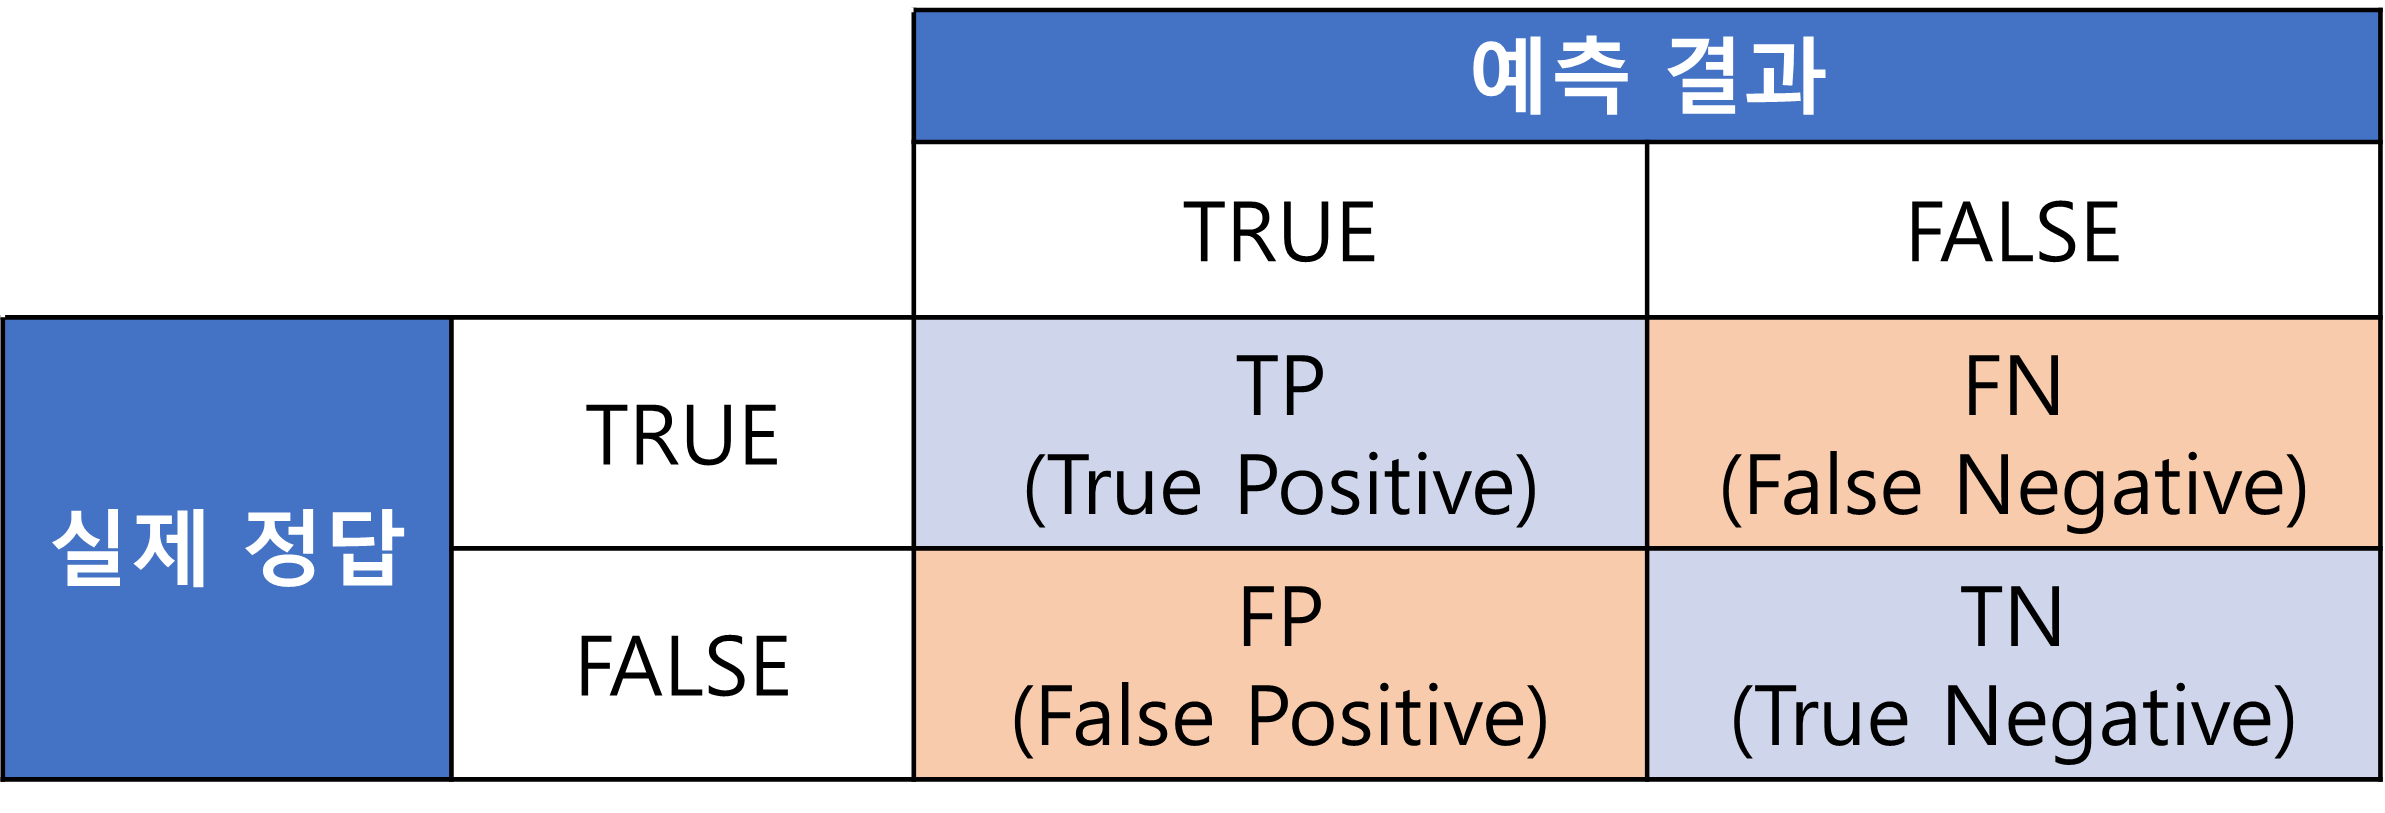

In [55]:
# 라이브러리 import
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [60]:
predictions = lr_model.predict(X_test)

In [57]:
# confusion matrix
cnf_matrix = confusion_matrix(Y_test, predictions)

In [58]:
cnf_matrix

array([[32,  3],
       [ 0, 32]])

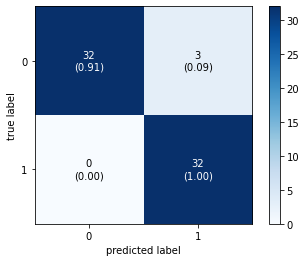

In [61]:
# Confusioin Matrix 시각화 하기
figure, ax = plot_confusion_matrix(conf_mat = cnf_matrix, # confusion atrix
                                   show_absolute = True, # 절대값 보여주기
                                   show_normed = True, # 비율 보여주기
                                   colorbar = True)

plt.show()

> ### 정확도(Accuracy)/ 정밀도(Precision)
> - 정확도와 정밀도는 항상 헷갈리지만, 함께 봐야하는 중요한 지표 중 하나이다.
> - scikit-learn에선 0-1 사이 값으로 계산해 줍니다.
> - **정확도(Accuracy)** :'전체 분류 결과 중' 에서 '실제 참으로 맞춘 비율'
    - 전체 데이터에서 얼마나 맞췄냐?
    - TP + TN / TP + FP + TN + FN
> - 정밀도(precision) : '참으로 분류한 것 중'에 '실제 참의 비율'
    - 얼마나 정밀하게 참으로 분류했는가?
    - TP/TP + FP

In [62]:
# libary import
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [64]:
#정확도
accuracy_score(Y_test, predictions)

0.9552238805970149

In [65]:
#정밀도
precision_score(Y_test, predictions)

0.9142857142857143

> ### 재현율(Recall)
> - 재현율(Recall)은 Hit Ratio등으로 불리는 지표이다.
> - 정밀도와 개념이 유사하지만, 다른 점은 분모 부분이 '실제 참 값'이 들어간다.
> - sckit-learn에선 0-1 사이 값으로 계산
> - 재현율(Recall) : '**실제**참값 중에서 '참으로 분류한 비율'
    - 참 값을 얼마나 잘 재현 했는가?
    - TP / TP + FN

In [68]:
# libary import
from sklearn.metrics import recall_score

In [71]:
recall_score(Y_test, predictions)

1.0

> ### F1점수 (F1-score)
> - F1-score는 재현율과 정밀도가 한쪽으로 치우치지 않았는지 나타내는 지표이다.
> - 재현율과 정밀도는 한쪽이 높아지면, 다른 한쪽은 낮아지는 관계(Trade-off관계)가 있습니다. 만약 정밀도를 높이려 하면 재현율이 낮아집니다.
> - 주로 **데이터가 심각한 불균형 상태일 때** 성능 평가를 제대로 하기 위해서 사용
> - F1점수(Recall): '데이터 불균형을 보정한 분류 성능'
    - 데이터가 불균형을 보장한 분류 성능
    - 2 * Precision(정밀도) * Recall/ precision+Recall

In [72]:
# libary import
from sklearn.metrics import f1_score

In [74]:
f1_score(Y_test, predictions)

0.955223880597015

> ### ** ROC(Receiver Operator Characteristic)커브**
> - ROC 커브는 분류 모델의 판단 기준을 연속적으로 바꾸면서 성능에 어떤 변화가 있는지 측정하는 방법입니다.
> - TPR(True Postive Rate): 참 값에 대해 참으로 바로 예측하는 비율
    - TP/TP+FN
> - FPr(False Postive Rate): 거짓 값에 대해 참으로 틀리게 예측하는 비율
    - FP/FP + TN
> - 커브 아래 면적을 AUC(Area under the ROC curve)라고 한다.
> - 이 AUC 면적이 클수록 성능이 좋은 모델이다.

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

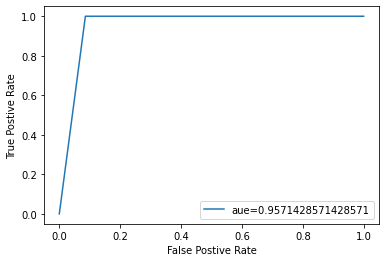

In [79]:
# roc 커브 시각화
fpr, tpr, _ = roc_curve(Y_test, predictions)
auc = roc_auc_score(Y_test, predictions)
plt.plot(fpr,tpr, label='aue='+str(auc))
plt.legend(loc='lower right')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.show()

In [80]:
# 전체 분류 모델 성능 지표
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1_score = f1_score(Y_test, predictions)
auc_score = roc_auc_score(Y_test, predictions)

print("accuracy: {}".format(round(accuracy, 2)))
print("precision: {}".format(round(precision, 2)))
print("recall: {}".format(round(recall), 2))
print("f1_score: {}".format(round(f1_score, 2)))
print("auc_score: {}".format(round(auc_score, 2)))

accuracy: 0.96
precision: 0.91
recall: 1
f1_score: 0.96
auc_score: 0.96
